# Chapter 1. The Nature of Time Series Data

In this chapter, we begin to delve into the properties of Ordinary Least Square (OLS) for estimating linear regression models using time series data.

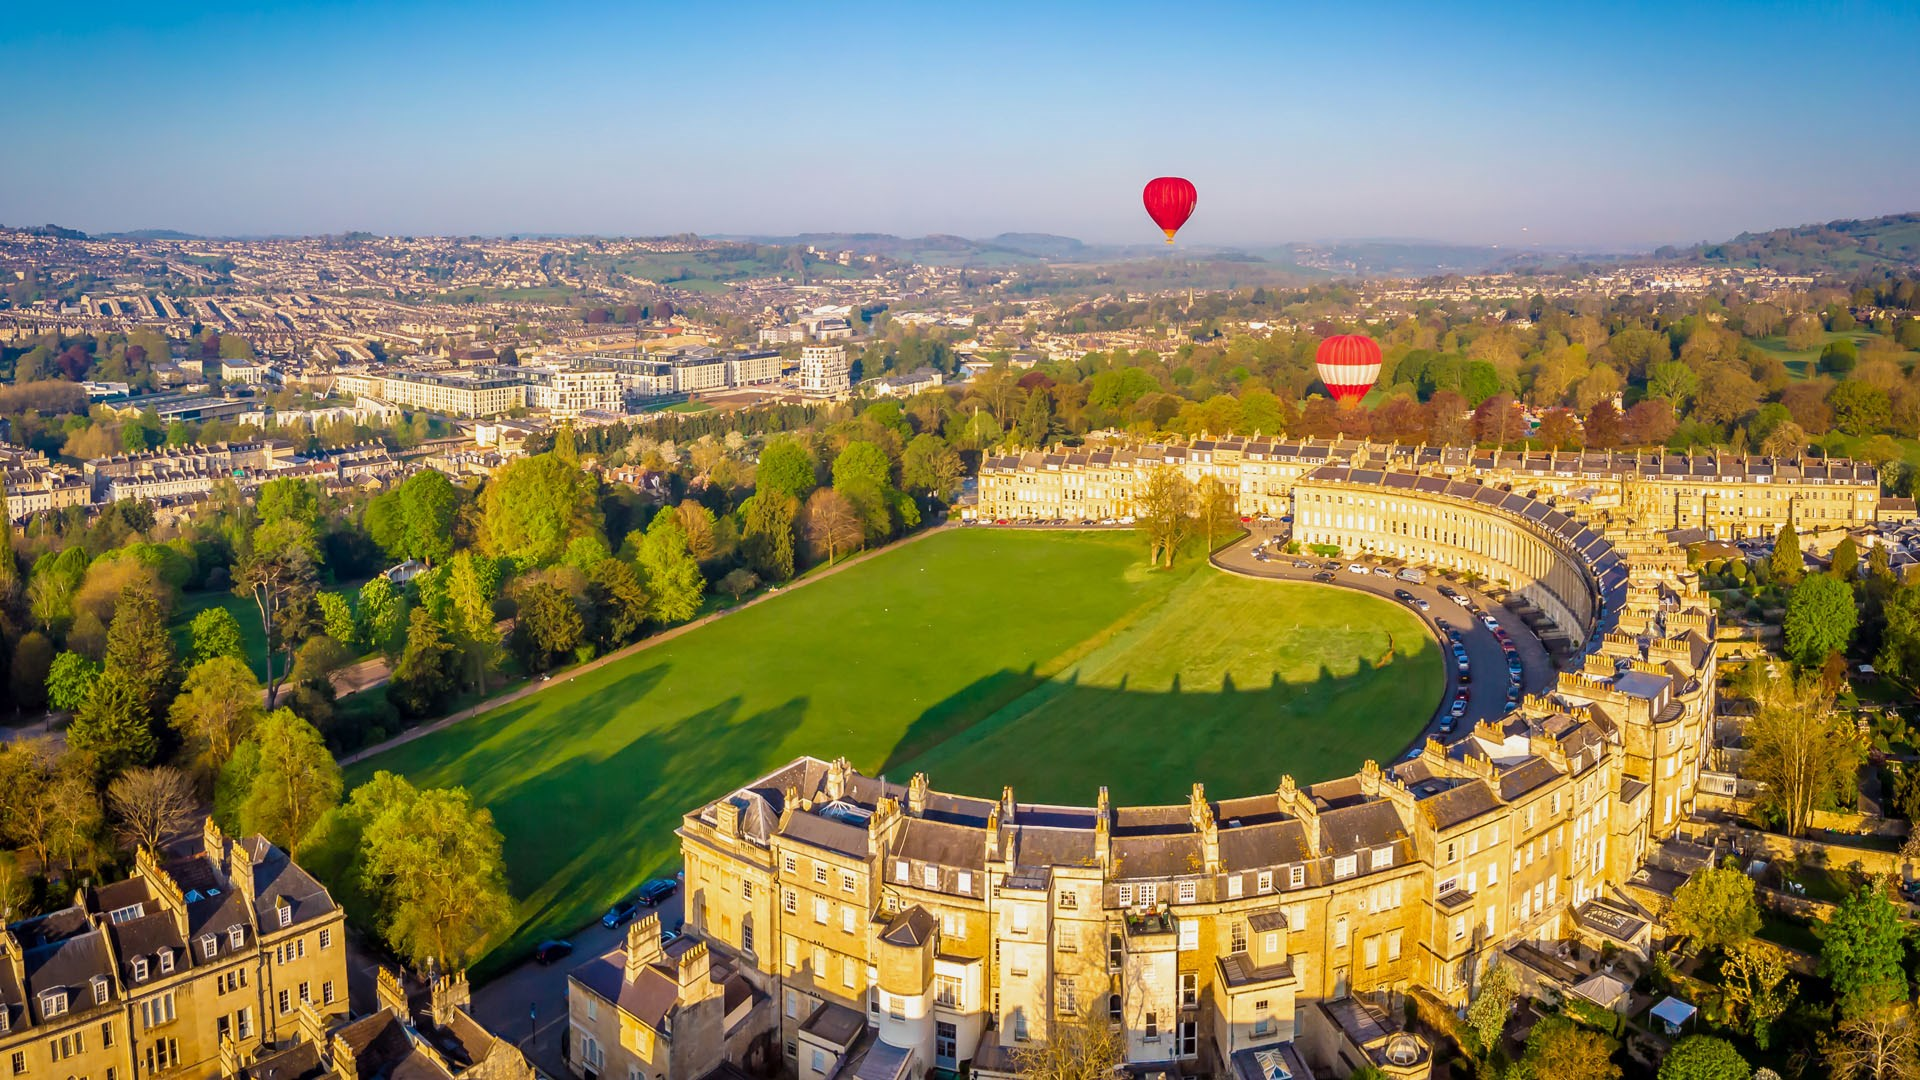

## Before we take off, you need to know ···

### In general, data can be simply classified to four types:
- 1. Cross-sectional data
- 2. **Time series data**
- 3. Panel data 
- 4. Pooled cross section

### Assumptions of Classical Linear Regression Models
- **MLR.1 Linear in Parameters**

  The model in the population can be written as
  
  $$ y=\beta_0+\beta_1x_1+\beta2x_2+···+\beta_kx_k+u $$
  
  where ${\beta_1, \beta2, ···, \beta_k}$ are the unknown parameters (constants) of interest and $u$ is an unobserved random error or disturbance term.  
  
  
- **MLR.2 Random Sampling**  


- **MLR.3 No Perfect Collinearity**  
  None of the independent variables is constant, and there are no exact linear relationships among the independent variables.  
  
  
- **MLR.4 Zero Conditional Mean**<br>
  The error $u$ has an expected value of zero given any values of the independent variables
  $$E(u|x_1, x_2, ···, x_k)=0$$
  
  
- **MLR.5 Homoskedasticity**<br>
  The error $u$ has the same variance given any values of the explanatory variables
  $$Var(u|x_1, x_2, ···, x_k)=\sigma^2$$  
  

- **MLR.6 Normality in Error Terms**

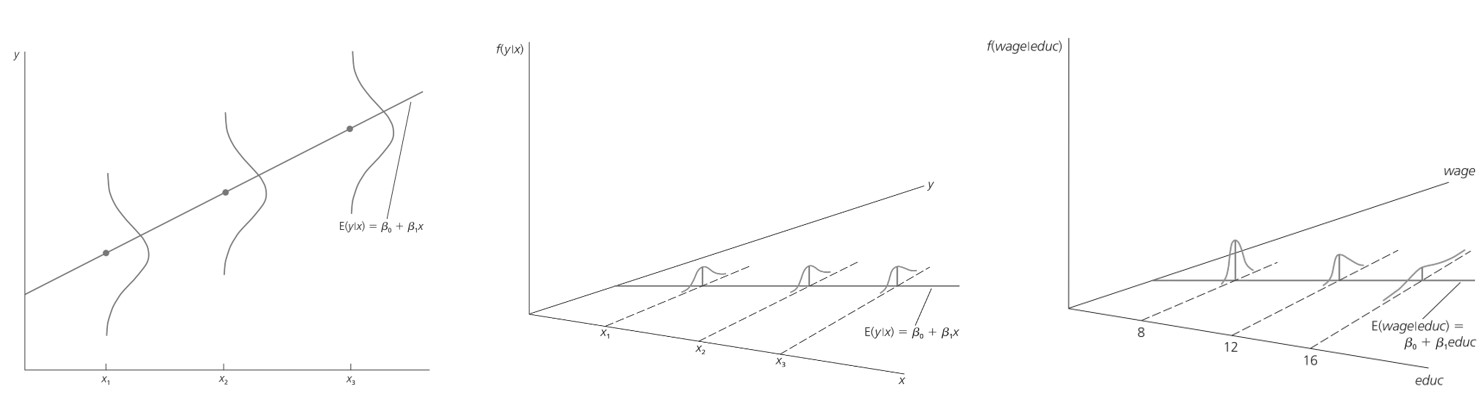  


$$ Data\ Distribution\ of\ Each\ Variables $$

### Tips  


- **Under assumptions MLR.1 - MLR.4** the OLS estimators are unbiased estimators of the population parameters.<br>  


- **Under assumptions MLR.1 - MLR.5** Gauss-Markov Theorem: Best Linear Unbiased Estimators (BLUEs).  


- **Under assumptions MLR.1 - MLR.6** Assumptions of the Classical Linear Regression Model (CLRM).

## The Properties of Time Series Data

In this section, we focus on the properties of time series data to mine the corresponding characteristics when modeling specific phenomena.

### 1. The Difference between Cross-sectional Data & Time Series Data  


- **Temporal ordering.<br>**  


- **Time series data violates the assumption of random sampling.<br>**
  Cross sectional data can be viewed as random outcomes, a different sample drawn from population will generally yield different values. 
  
  However, time series data is the consequence of a **stochastic process**. We can only see a single outcome, because we cannot go back in time and start the process again. In other words, we can only observe one random sample

**Example 1.**  


Jack ate rice the day before yesterday. He ate pizza yesterday and noodles today.
What will Jack eat tomorrow?

**The Structure of Time Series Data** Versus **The Structure of Random Sampled Time Series Data(Synthetic)**

In [2]:
import pandas as pd
import numpy as np

columns = ['The Day Before Yesterday', 'Yesterday', 'Today']
example1 = ['Rice', 'Pizza', 'Noodles']
example2 = ['Rice', 'Noodles', 'Pizza']
example3 = ['Pizza', 'Rice', 'Noodles']
example4 = ['Pizza', 'Noodles', 'Rice']
example5 = ['Noodles', 'Pizza', 'Rice']
example6 = ['Noodles', 'Rice', 'Pizza']
example = [example1, example2, example3, example4, example5, example6]

TS1 = pd.DataFrame(data=np.array(example1).reshape(-1,3), columns=columns)
TS2 = pd.DataFrame(data=example, columns=columns)
print('Time series data')
TS1.head()

Time series data


,The Day Before Yesterday,Yesterday,Today
0,Rice,Pizza,Noodles


In [3]:
print('The Structure of Random Sampled Time Series Data(Synthetic):')
TS2.head()

The Structure of Random Sampled Time Series Data(Synthetic):


,The Day Before Yesterday,Yesterday,Today
0,Rice,Pizza,Noodles
1,Rice,Noodles,Pizza
2,Pizza,Rice,Noodles
3,Pizza,Noodles,Rice
4,Noodles,Pizza,Rice


### 2. Impact Propensity & Long Run Propensity  

In this part, we aim to provide an intuition on two important properties of time series data: Impact Propensity & Long Run Propensity.

#### (1) Static Model：Fundamental Identification of Time Series Regression Models

Suppose that we have time series data available on two variables, say ***y*** and ***x***, where $y_t$ and $z_t$ are dated contemporaneously. A static model relating ***y*** to ***x*** is  
 
 
$$y_t = \alpha_0 + \alpha_1x_t + \mu_t, t=1,2,3,……,n$$

Usually, a static model is postulated when a change in ***x***  at time ***t***  is believed to have an immediate effect on ***y*** :
$$Δy_t=\beta_1Δx_t,\ when\ Δ\mu_t=0$$

#### (2) Finite Distributed Lag Model (FDL)

There are seveal points we need to clarify before delving into FDL.  


- The first question we need to clarify is: **What is Lag Effect**?<br>

  **Lag effects ocurr everywhere！**

  **Intuition**： Explanatory variable might have a casual effect on the response variable, but the casual effect occurs gradually, and manifests in changes to the response later in time.
  
  **Fundamental Modeling Approach**：A regression equation is used to predict current values of a response variable based on both current values of an explanatory variable and the lagged values of this explanatory variables.
  
  **Finite Distribution Model (FDL)**：We allow one or more variables to affect y with a lag. The following equation is an example of the model
  
  $$y_t = \beta_0 + \alpha_0x_t + \alpha_1x_{t-1}+ \alpha_2x_{t-2}+ \mu_t, t=1,2,3,\dots,n$$
  
  which is an FDL *of order two*.

- As for the second question, we focus on identifying **the potential reasons for lag effects.**
 - Human Behaviors;
 - Policy;
 - Techniques···<br>

#### (3) Impact Propensity

- **Defination**：In a distributed model, the immediate change in the response variable given a one-unit increase in the explanatory variable.   


- **Intuition**：How to interpret the coefficients of FDL?

  Take an FDL of order two as example:
  
  $$y_t = \beta_0 + \alpha_0x_t + \alpha_1x_{t-1}+ \alpha_2x_{t-2}+ \mu_t, t=1,2,3,\dots,n$$
  
  Suppose $x$ is a constant, equal to c, in all time periods before time $t_0$. $c$ increases by one unit to $c+1$ at time $t_0$ and then reverts to its previous level at time $t+1$, in other words
  $$x_t=c+1 \cdots t=t_0\\x_t=c \cdots t\not=t_0$$
  
  To focus on the ceteris paribus effect of $x$ on $y$, we set the error term in each time period to zero, then:
  
  $$y_{t_0-1}=\beta_0 + \alpha_0c + \alpha_1c+ \alpha_2c\\
  y_{t_0}=\beta_0 + \alpha_0(c+1) + \alpha_1c+\alpha_2c\\
  y_{t_0+1}=\beta_0 + \alpha_0c + \alpha_1(c+1)+\alpha_2c\\
  y_{t_0+2}=\beta_0 + \alpha_0c + \alpha_1c+\alpha_2(c+1)\\
  y_{t_0+3}=\beta_0 + \alpha_0c + \alpha_1c+\alpha_2c$$

  From the first two equations, $y_t-y_{t-1}=\alpha_0$, which shows that $\alpha_0$ is the immediate change in $y$ due to the one-unit increase in $x$ at time $t_0$. $\alpha_0$ is usually called the **impact propensity**.

#### (4) Long Run Propensity(LRP)

- **Defination**：Long run propensity(LRP) refers to the cumulative effect following a permanent one-unit change in the explanatory variable.

- **Intuition**：We are also interested in the change in $y$ due to a permanent increse in $x$. Similarly, we assume another special case: 

  $$x_t=c \cdots t<t_0\\x_t=c+1 \cdots t≥t_0$$
  
  To focus on the ceteris paribus effect of $x$ on $y$, we set the error term in each period of time to zero, then:
  
  $$y_{t_0-1}=\beta_0 + \alpha_0c + \alpha_1c+ \alpha_2c\\
  y_{t_0}=\beta_0 + \alpha_0(c+1) + \alpha_1c+\alpha_2c\\
  y_{t_0+1}=\beta_0 + \alpha_0(c+1) + \alpha_1(c+1)+\alpha_2c\\
  y_{t_0+2}=\beta_0 + \alpha_0(c+1) + \alpha_1(c+1)+\alpha_2(c+1)$$
  
  We can notice that, the sum of the coefficients on current and lagged $x$, $\alpha_0+\alpha_1+\alpha2$, is the long-run change in y given a permanent increase in $x$ and is called the long-run propensity(LRP).
  
  **In summary, the LRP of a finite distributed lag model of order q can be calculated by the sum of all the coefficients:**
  
  $$LRP=\alpha_0 + \alpha_1+\alpha_2+\cdots+\alpha_q$$

#### (5) Lag Distribution  


When we graph the $\alpha_i$ as a function of $i$, we obtain the **lag distribution**, which summarizes the dynamic effect that a temporary increase in $c$ on $y$.

**Example 2.**  


An example of lag distribution.

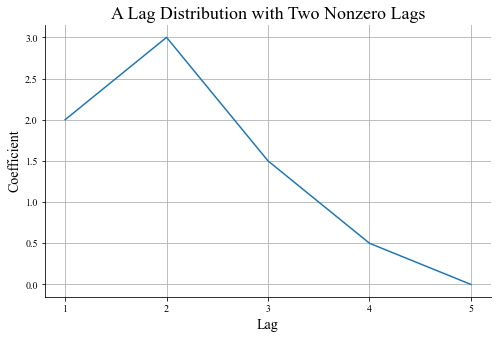

In [4]:
import matplotlib.pyplot as plt

lag = [1,2,3,4,5]
coefficient = [2,3,1.5,0.5,0]

plt.rc('font',family='Times New Roman')    # Font setting

fig0, ax0 = plt.subplots(figsize=(8,5))
ax0.plot(lag, coefficient)

# Axis settings
ax0.set_xlabel("Lag", fontsize=14)
ax0.set_ylabel("Coefficient", fontsize=14)
ax0.set_title("A Lag Distribution with Two Nonzero Lags",fontsize=18)
ax0.set_xticks(lag)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.grid()
plt.show()

### 3. Trend & Seasonality

#### (1) Data Description  


The data utilized in this section illustrates simultaneous GDP fluctuations for both the USA and Australia.  Sourced from publicly available data on the internet, it spans a total of 126 periods.

#### (2) Trend

 We plot the GDP fluctuations of the USA and observe a consistent upward trend over time.

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

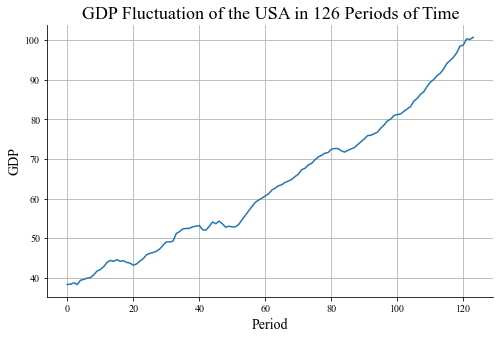

In [6]:
os.chdir(r'G:\02_2023_Spring\02_组会分享\TimeSeriesAnalysis')    #  Your work space
TSData1 = pd.read_stata(r'./gdp.dta')    # Your data

# Line plot
plt.rc('font',family='Times New Roman')    # Font setting
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(TSData1['usa'])

ax1.set_xlabel('Period', fontsize=14)
ax1.set_ylabel('GDP', fontsize=14)
ax1.set_title('GDP Fluctuation of the USA in 126 Periods of Time', fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid()
plt.show()

**What kind of statistical models adequately capture trending behavior?**

If we want to model GDP fluctuations in the USA, there are several models for us to choose from.
- **Modeling Idea 1：Linear time trend**

$$GDP_{year} = α_0 + α_1year + u_{year},  year = 1,2,3,…$$

- **Modeling Idea 2：Exponential trend** <br>

  A series has the same average growth rate from period to period, in other words, $\alpha_1$ is approximately the average per period growth rate in $GDP_{year}$.

$$log(GDP_{year}) = α_0 + α_1year + u_{year},  year = 1,2,3,…$$

$$Δlog(GDP_{year}) ≈ \cfrac{GDP_{year} - GDP_{year-1}}{GDP_{year-1}}=\alpha_1$$ 

- **Modeling Idea 3：More complex forms (Quadratic form.etc)**

$$GDP_{year} = α_0 + α_1{year} + α_2year^2 + u_{year},  year = 1,2,3,…$$

**Attention：Spurious Regression Problem**

- **Defination**<br>
  The phenomenon of finding a relationship between two or more trending variables simply because each is growing over time is an example of a spurious regression problem.  
  
  
- **Intuition**<br>
  If we attempt to explain the GDP fluctuations of Australia using the GDP of the USA, we might achieve a high R-squared because the GDP trends of both countries share similar characteristics. However, it is important to note that GDP changes in Austrlia do not cause fluctuations in the USA. As a result, we need to consider that **unobserved, trending factors that affect response variable might also be correlated with the explanatory variables.**
  

- **Problem Eliminate**：
  Unit root test

#### (3) Seasonality

If a time series is observed at monthly or quarterly intervals(or even weekly or daily), it may exhibit **seasonality**.

- **Intuition**<br>
  Monthly housing starts in the Midwest of the USA are strongly influenced by weather. Although weather patterns are somewhat random, we can be sure that the weather during January will usually be more inclement than in June, and so housing starts are generally higher in June than in January.  
  
  
- **Possible Reasons**
  1. **Weather factors**: winter heating & energy consumption
  2. **Administrative factors**：holiday & traffic volume
  3. **Holiday**："double eleven" & shopping behavior
  4. **Calendar**: leap years & leap months  

**Seasonal Adjustment**<br>  

- **Intuition**<br>
Even though many monthly and quarterly data series display seasonal patterns, not all of them do. For example, there is no noticeable seasonal pattern in monthly interest or inflation rates. In addition, series that do display seasonal patterns are often **seasonally adjusted** before they are reported for public use.  



- **Principle of seasonal adjustment：Decomposition of time series data**<br>
Time series data can be decomposed into several parts：  
  **Systematic**: Components that exhibit consistency or repetitiveness can be described and modeled.<br>
  **Non-Systematic**: Components that cannot be described.<br>  
  

- Time sereis data can be decomposed into **Four Parts：**

 - **Level**：Expection of the given time series.
 
 - **Trend**：The long-term movement in the data, representing the underlying pattern.
 
 - **Seasonality**：The repeating, short-term fluctuations caused by factors like seasons or cycles.
 
 - **Noise**：Random variability that remains after removing the trend and seasonality. 
 
 
- The time series decomposition techniques  can be categorized into **two types**.  

 - **Additive Model：**<br> $$ y(t) = Level + Trend + Seasonality + Noise $$  
 
 - **Multiplicative Model(Common in economic phenomenon)：**<br>$$y(t) = Level * Trend * Seasonality * Noise$$

**Example 4.**  


**Seasonal adjustment using additive model.**  


**Python Packages：**<br>
- [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)<br>
- [matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure)


The result of decompostion shows that there is significant seasonality in the GDP fluctuations of the USA.

In [7]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)    # Ignore all the future warning
warnings.filterwarnings('ignore', category=UserWarning)     # Ignore all the user warning

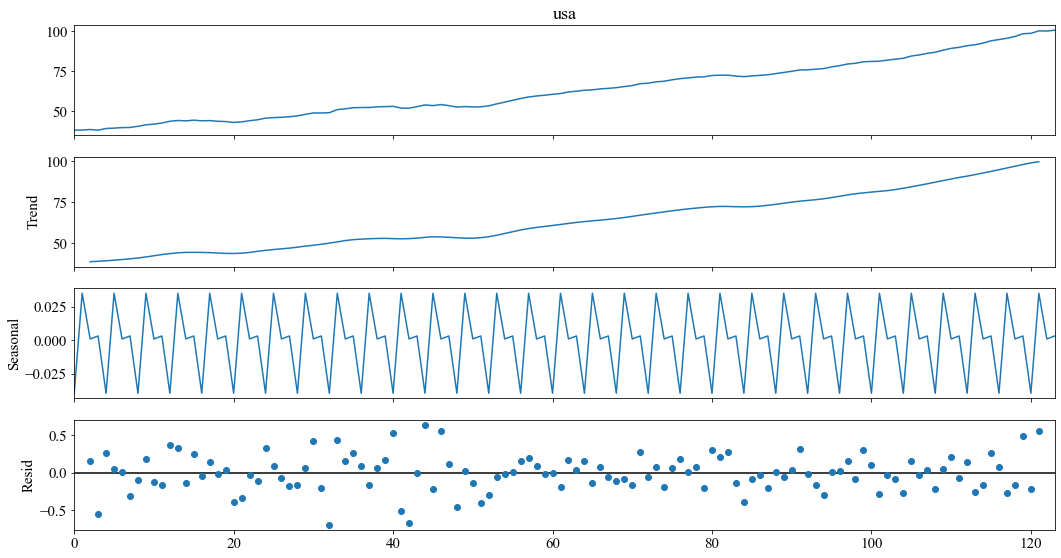

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# GDP is generally reported on a quarterly basis
result = seasonal_decompose(TSData1['usa'], model='additive',period=4)    # Param period=4
plt.rc('font',family='Times New Roman',size=15)    # Font setting
fig3 = result.plot()
fig3.set_size_inches(15,8)
fig3.tight_layout()
plt.show()

**Example 5.**  


**Seasonal adjustment using multiplicative model.**<br>   


**Python Packages：**<br>
- [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)<br>
- [matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure)


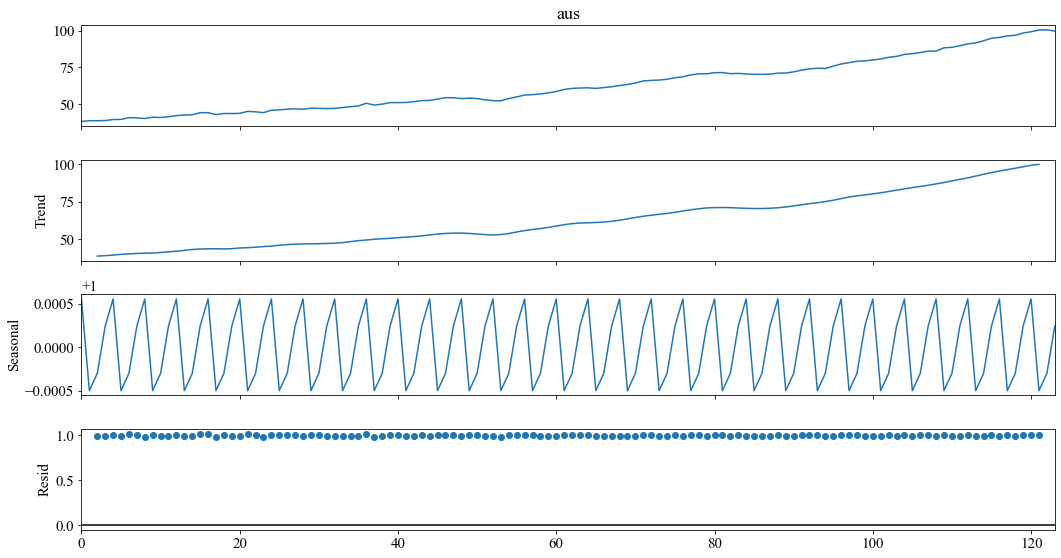

In [36]:
result = seasonal_decompose(TSData1['aus'], model='multiplicative', period=4)
plt.rc('font',family='Times New Roman',size=15)    # Font setting

fig4 = result.plot()
fig4.set_size_inches(15,8)
fig4.tight_layout()
plt.show()

### 4. Stationary & Non-stationary

#### (1) Conditions for Stationary Time Series
For variables and all their lagged terms, the following conditions need to be met:  


$$E(y_t)=\mu (Constant Mean)$$
$$Var(y_t)=\sigma^2 (Constant Variance)$$
$$cov(y_t,y_{t+s})=cov(y_t,y_{t-s})=\gamma_s (Covariance depends on s not t)$$

**Example 6.**  


**Please observe the following plots, which ones dipict stationary time series data?**

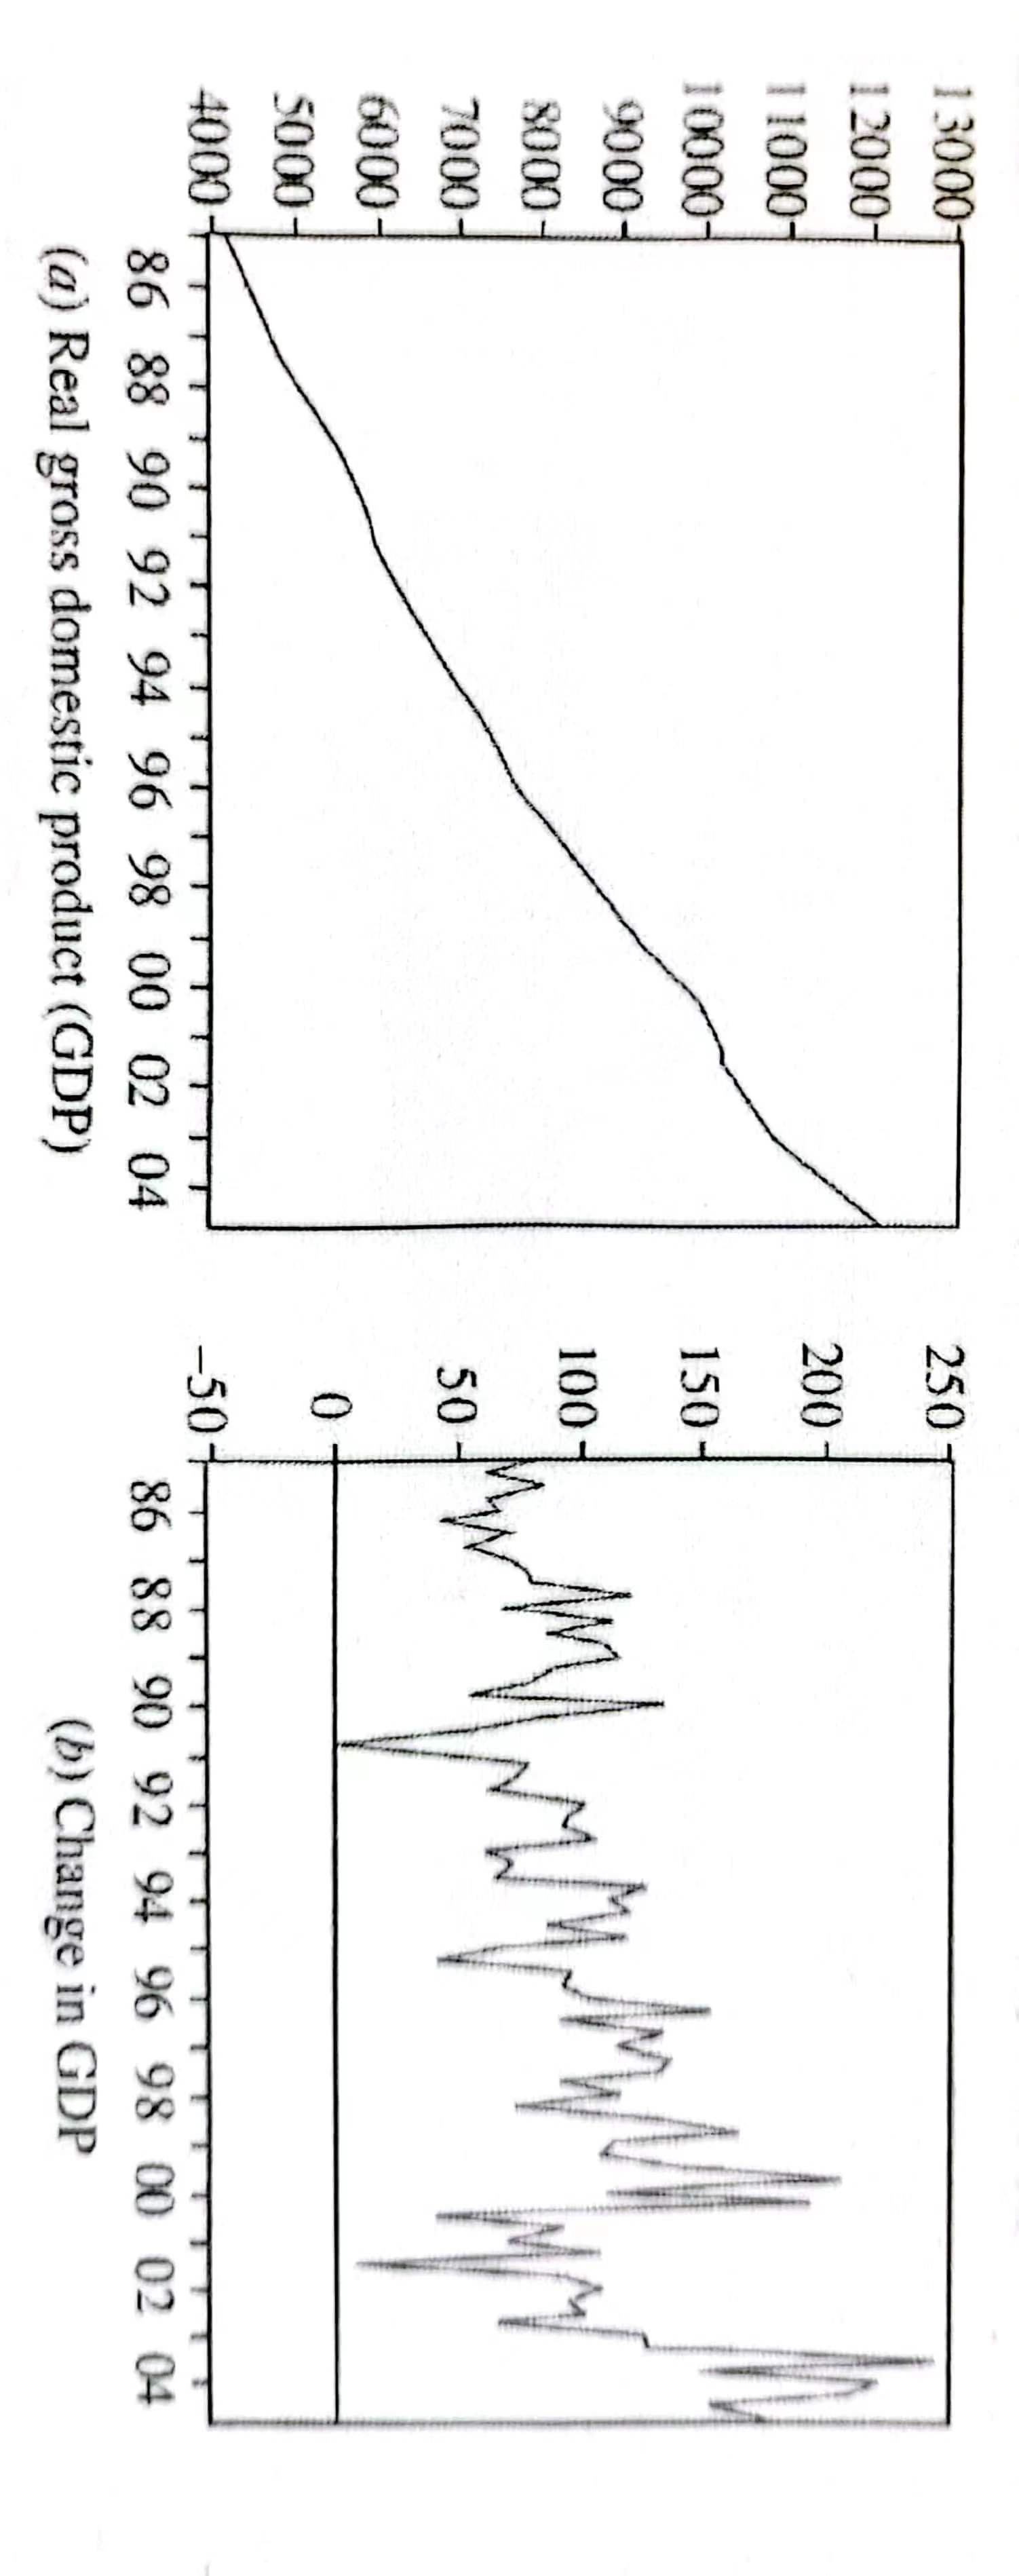

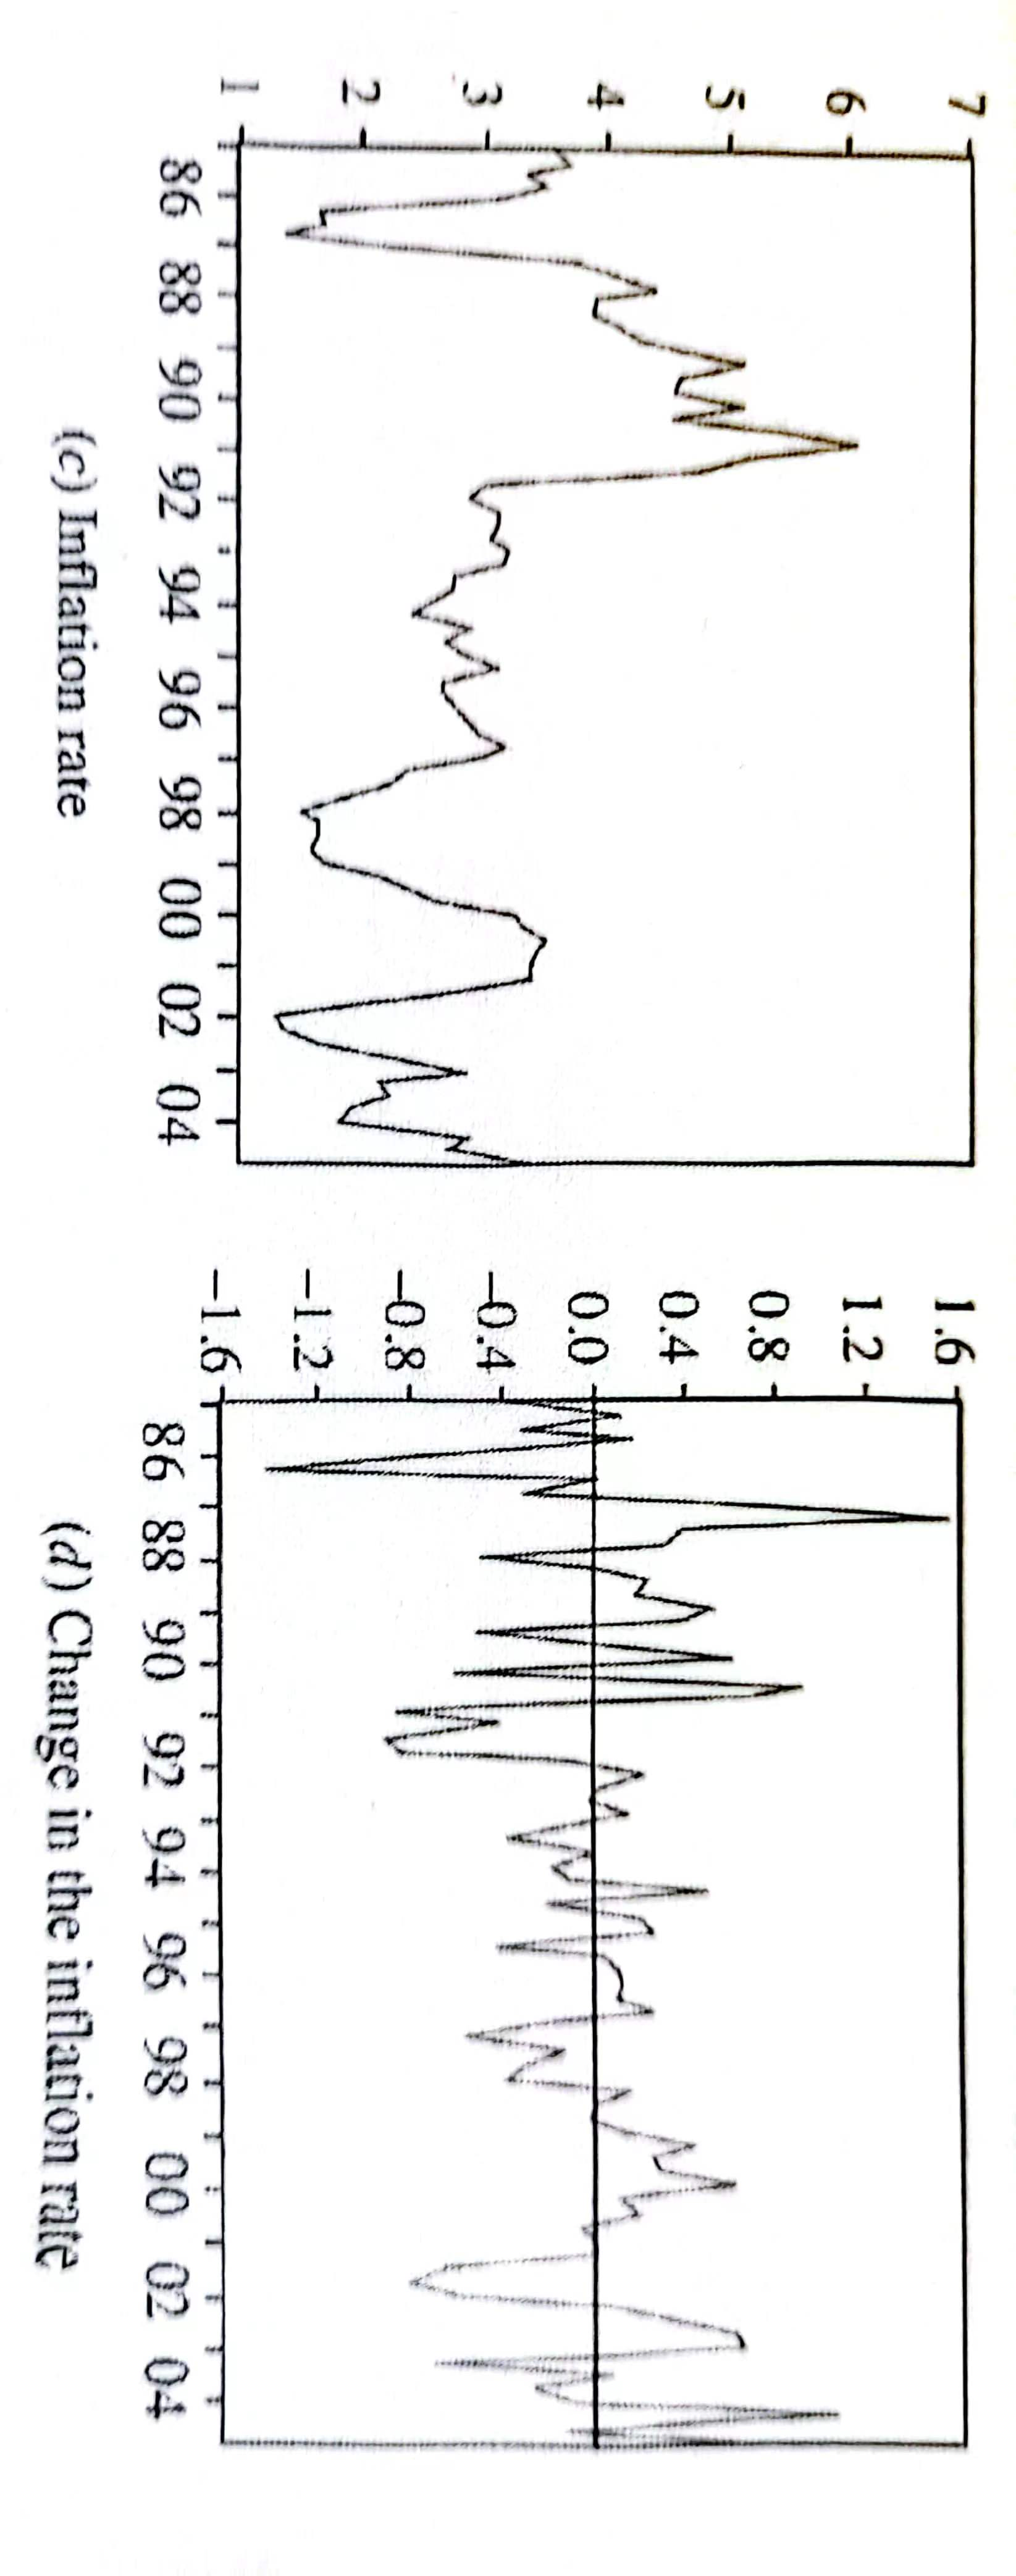

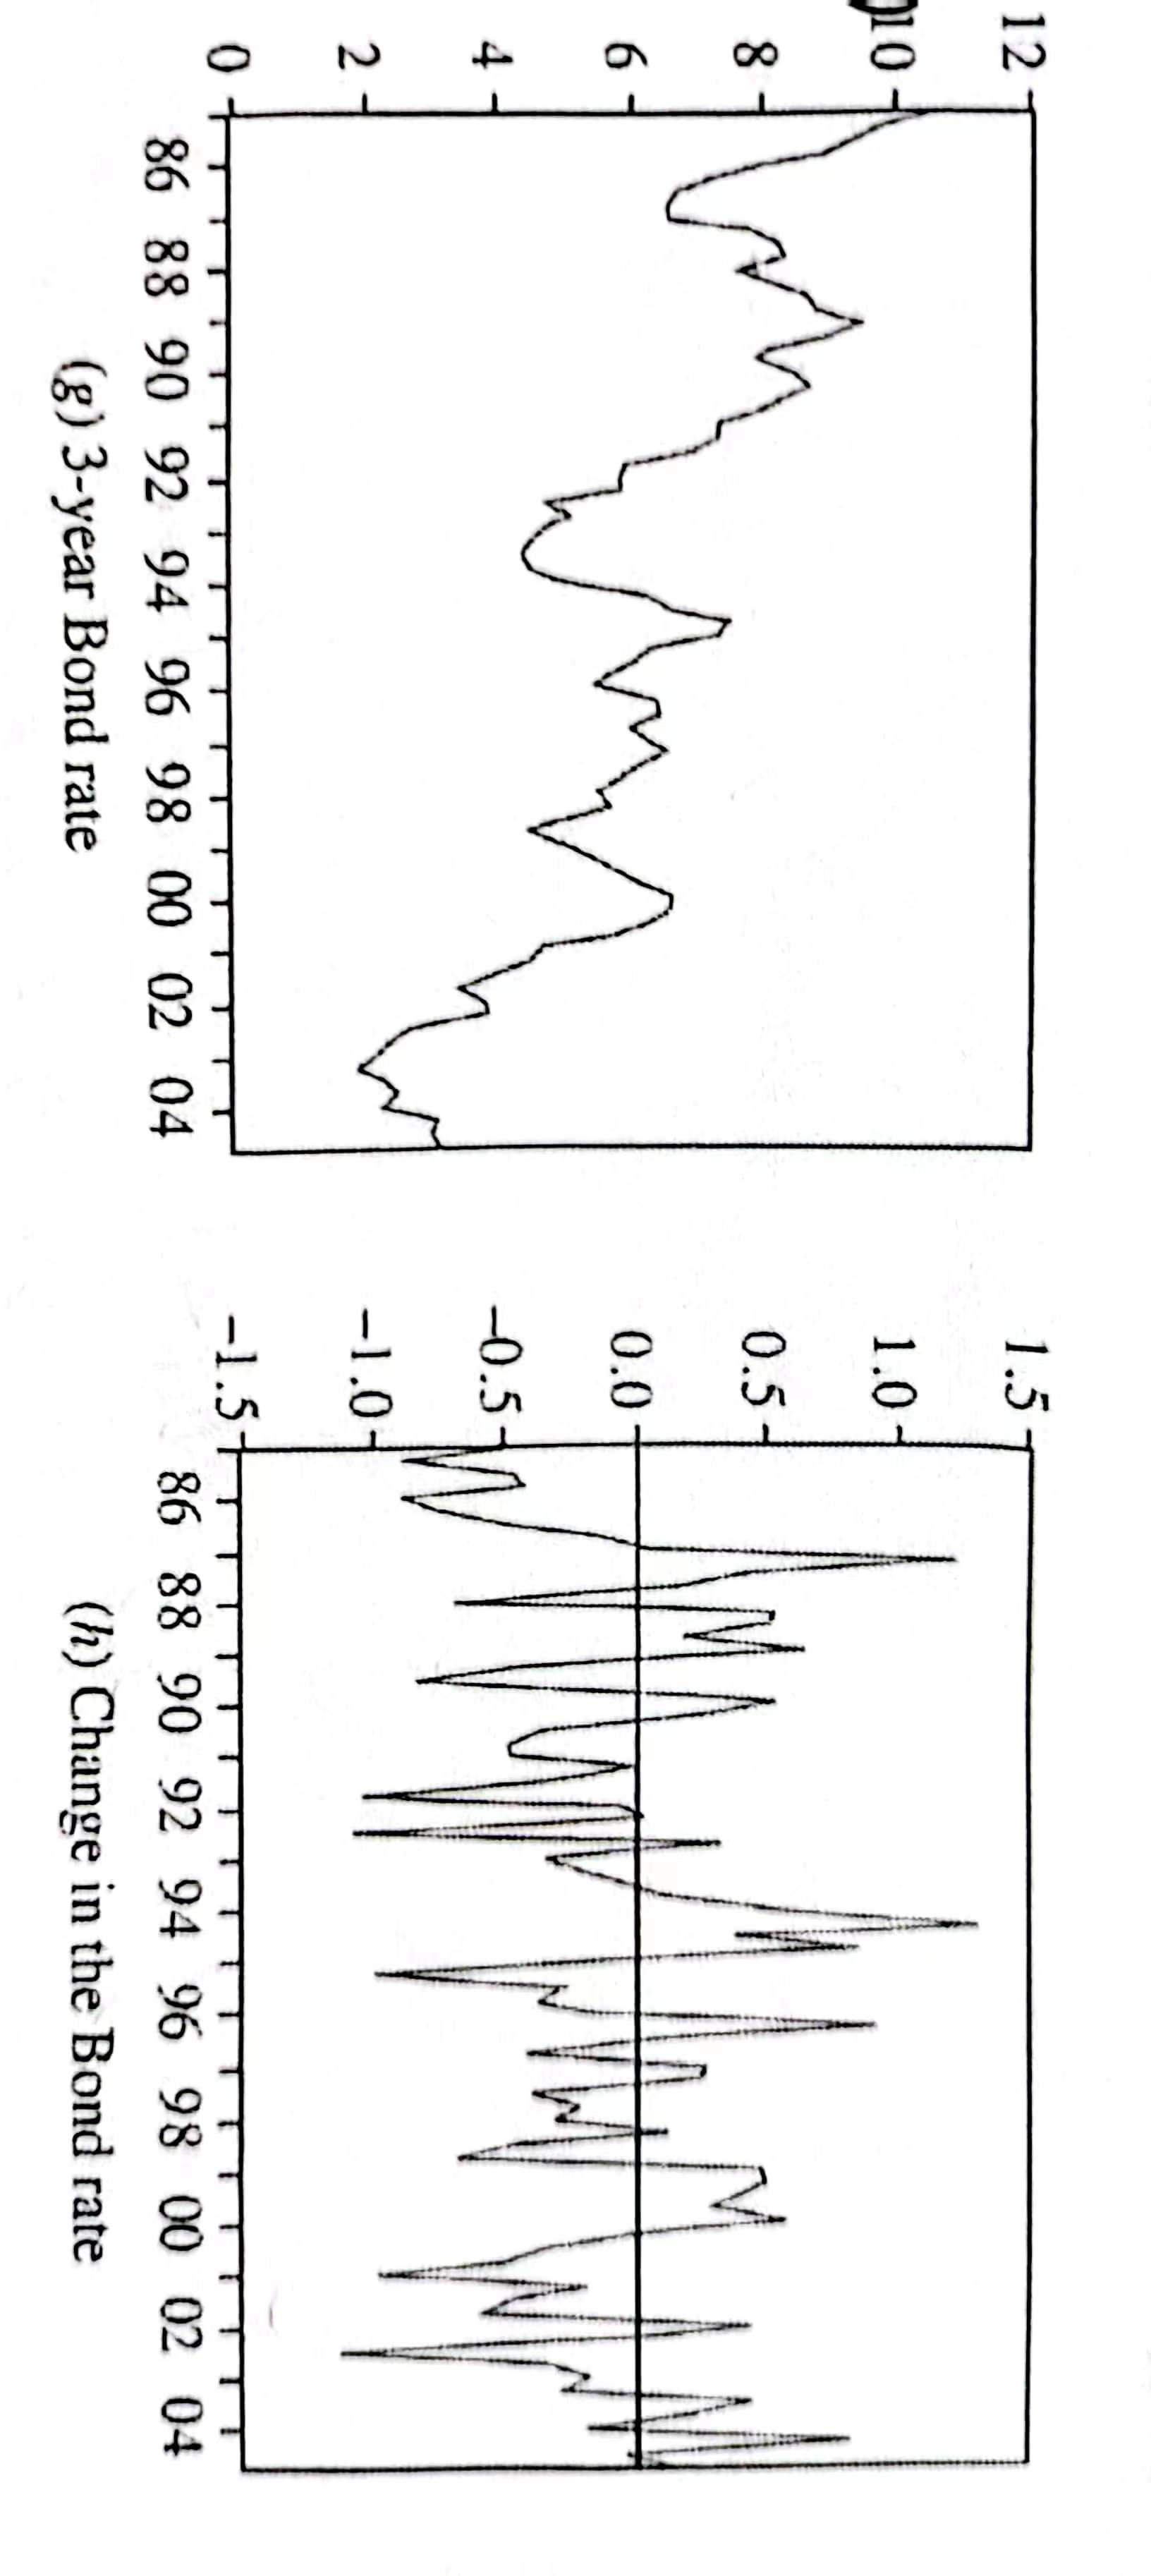

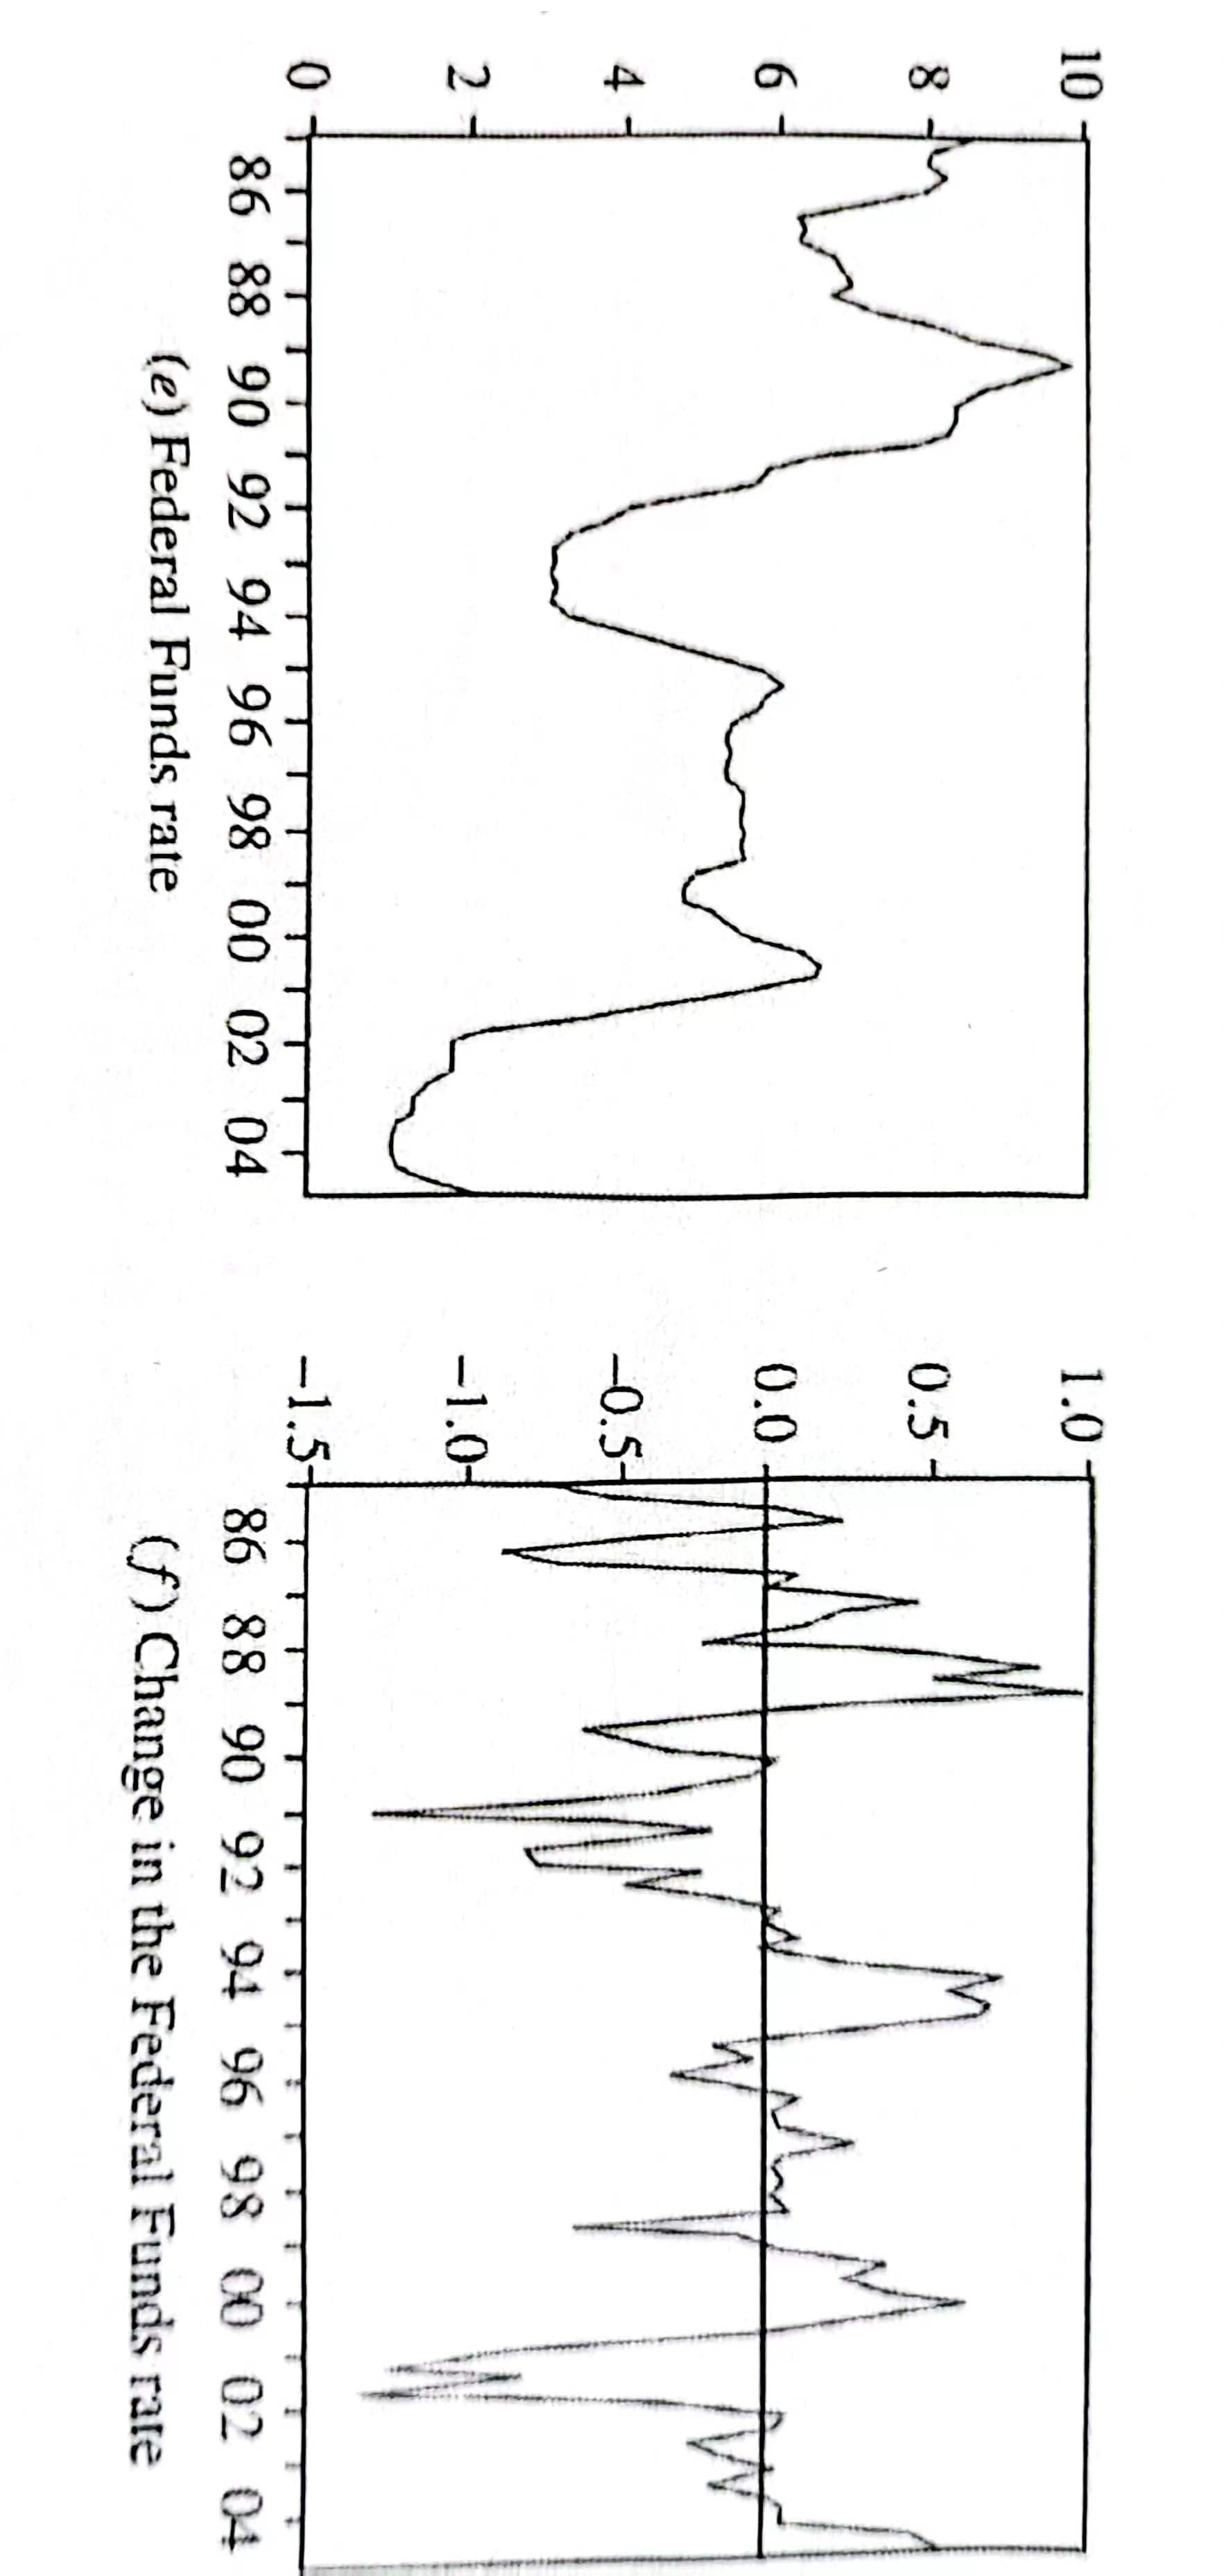

#### (2) Attention


- **Stationary is the most important property of time series data.**  


- When applying non-stationary data for analysis, it is important to be aware of the potential occurrence of **spurious regression errors**.

# Chapter 2. Visualising Time Series Data with Python

In this chapter, we present several visualization methods for plotting univariate time series data, including:
- Time Series Line Plot;
- Hist Plot & Density Plot;
- Box Plot & Violin Plot;
- Heat Map;
- Lag Plot;
- Autocorrelation Plot.

## Data Description  


The data we used in this section depicts the minmum daily temperature in Melbourne, Australia between 1981 and 1990,measured in degrees Celsius (℃). The data source is the Australian Bureau of Meteorology, with a total of 3650 observations.

## Python packages used in our lesson
In this tutorial, we will work with four powerful Python packages: **Pandas, Matplotlib, Statsmodels and Seaborn**. All four packages have extensive online documentation, we have provided the related resources for learning below.

- [Matplotlib Documentation](https://matplotlib.org/stable/gallery/index.html)
- [Seaborn API Reference](https://seaborn.pydata.org/api.html)
- [Statsmodel API Reference](https://www.statsmodels.org/stable/api.html)
- [Pandas Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html)

## Operation Steps

### Step 1. Load data

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
os.chdir(r'G:\02_2023_Spring\02_组会分享\TimeSeriesAnalysis')
TSData = pd.read_csv(r'visual.csv')
TSData.head()

,Date,Temp
0,1981-1-1,20.7
1,1981-1-2,17.9
2,1981-1-3,18.8
3,1981-1-4,14.6
4,1981-1-5,15.8


### Step2. Time series line plot

Line plot is the most common visualization approach to uncover **trends** and **periodic patterns** in time series data.<br>  


See the [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) for more infomation.

Our example data exhibits a noticeable periodic pattern.

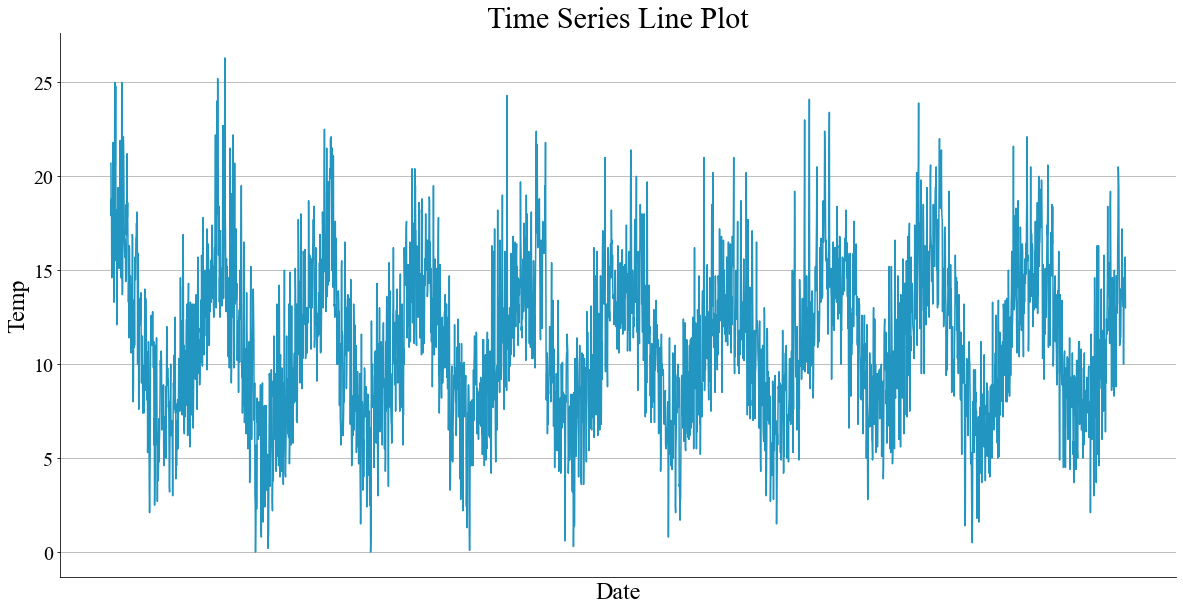

In [20]:
plt.rc('font',family='Times New Roman', size=20)    # Font setting

fig5,ax5 = plt.subplots(figsize=(20,10))
ax5.plot(TSData['Date'], TSData['Temp'], c="#2295c1")

# axis setting
ax5.set_xlabel('Date', fontsize=24)
ax5.set_ylabel('Temp', fontsize=24)
ax5.set_title('Time Series Line Plot',fontsize=30)
ax5.set_xticks([])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

plt.grid(True)
plt.show()

### Step3. Grouping and plotting time series data.

In [21]:
TSData['year'] = pd.to_datetime(TSData['Date'], format='%Y-%m-%d').dt.year
TSData.head()

,Date,Temp,year
0,1981-1-1,20.7,1981
1,1981-1-2,17.9,1981
2,1981-1-3,18.8,1981
3,1981-1-4,14.6,1981
4,1981-1-5,15.8,1981


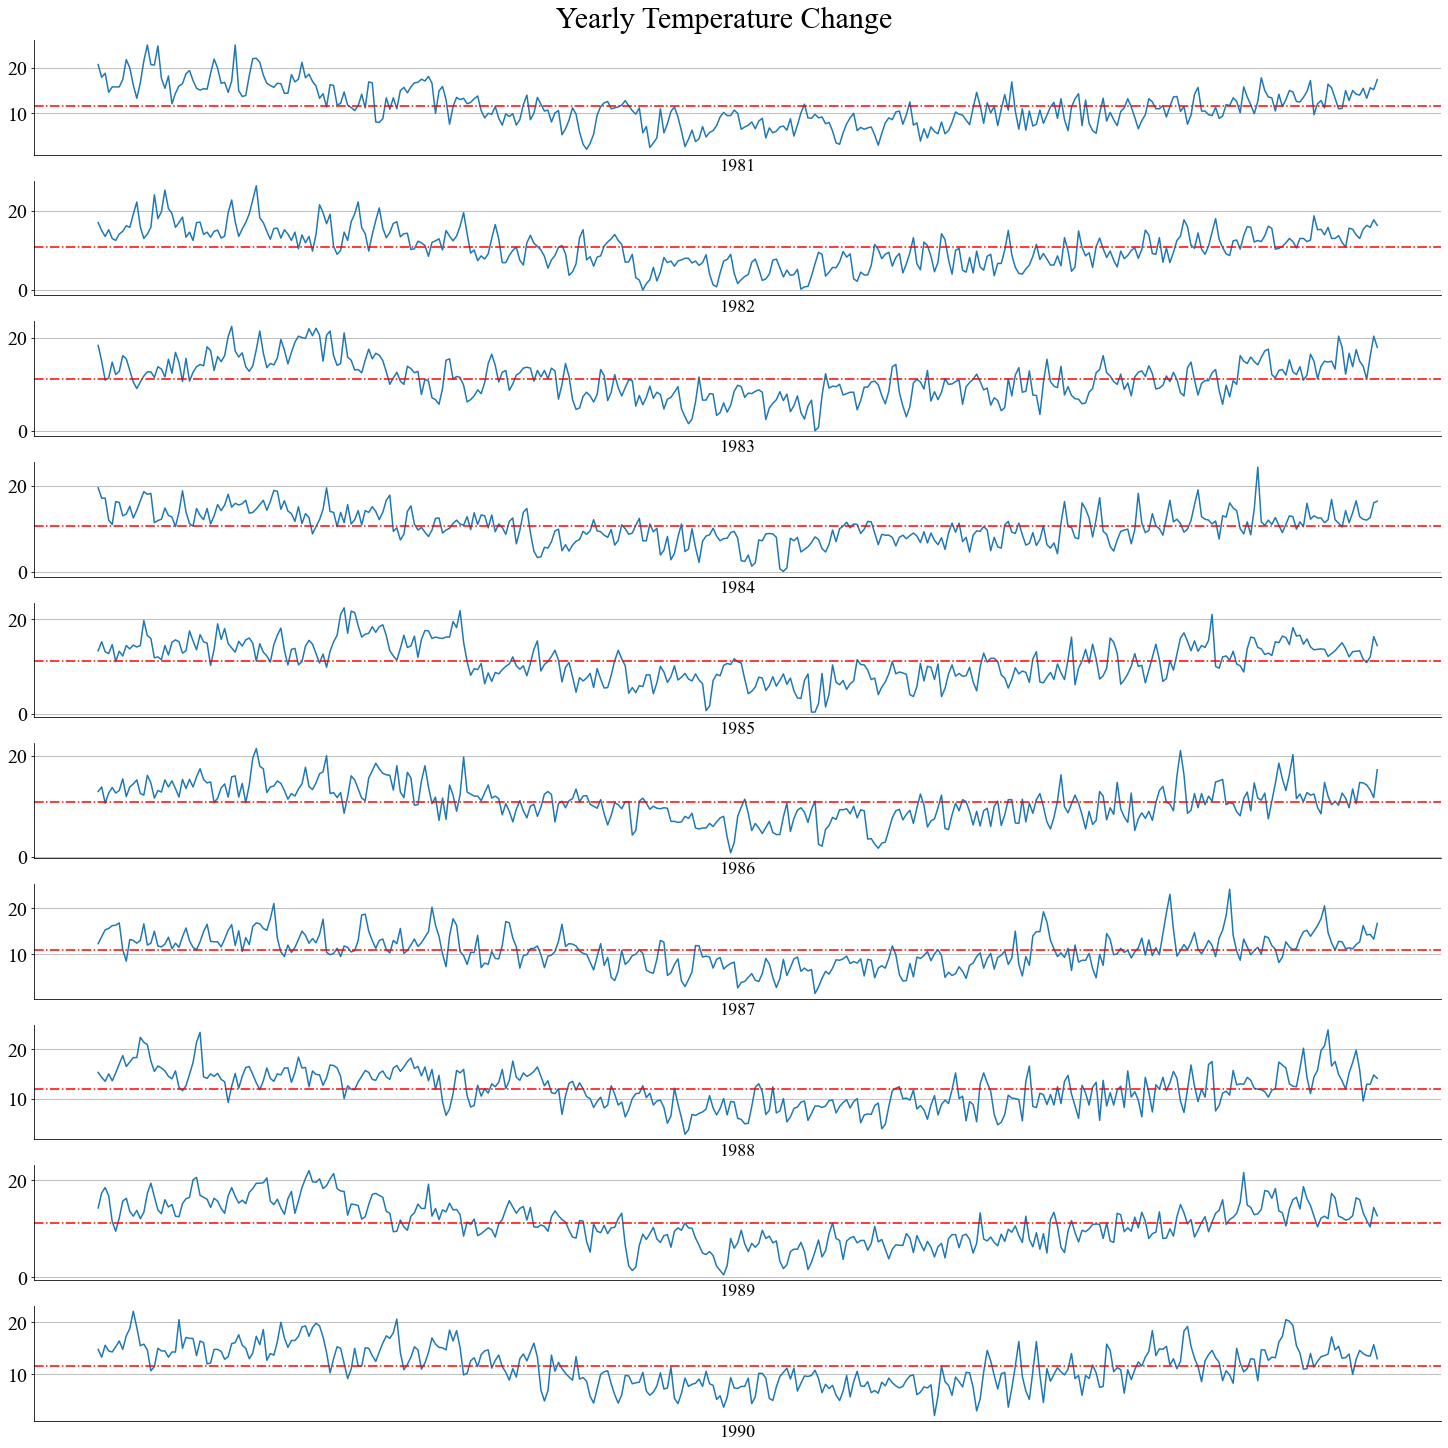

In [22]:
# Yearly temperature change
yearUnique = np.unique(TSData['year'].values)[:10]

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig6,axs6 = plt.subplots(len(yearUnique), 1, figsize=(20,20),constrained_layout=True)
fig6.suptitle('Yearly Temperature Change',fontsize=30)

for i in range(len(yearUnique)):
    # Plot temperature fluctuations for each year
    dataYear = TSData[TSData['year'].values==yearUnique[i]]['Temp']
    axs6[i].plot(dataYear)
    axs6[i].axhline(y=dataYear.mean(),c='r',linestyle='-.')
    axs6[i].set_xticks([])
    axs6[i].set_xlabel(yearUnique[i], fontsize=18)
    axs6[i].spines['right'].set_visible(False)
    axs6[i].spines['top'].set_visible(False)
    axs6[i].grid(True)

plt.show()

### Step4. Histograms & kernel density plots

Histograms & kernel density plots provide approaches for visualizing the distribution of data.<br>  


Please visit the [Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py) for more information.  

The distribution of the example data exhibits characteristics of a **normal distribution**.

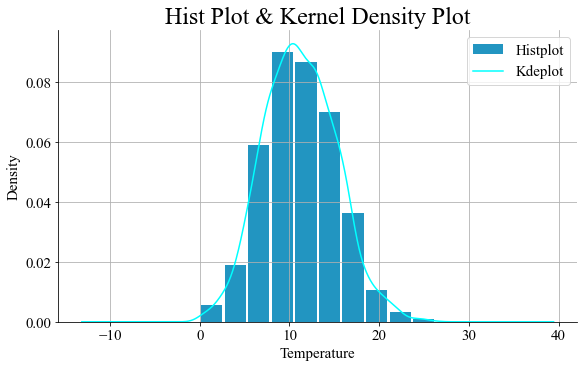

In [23]:
plt.rc('font',family='Times New Roman', size=15)    # Font setting
fig7,ax7 = plt.subplots(figsize=(8,5),constrained_layout=True)

TSData['Temp'].plot(kind='hist', density=True, label="Histplot", color="#2295c1",rwidth=0.9,ax=ax7)
TSData['Temp'].plot(kind='kde', label="Kdeplot", color='cyan', ax=ax7)

ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_xlabel('Temperature', fontsize=15)
ax7.set_ylabel('Density', fontsize=15)

plt.legend(fontsize=15, loc='upper right')
plt.title('Hist Plot & Kernel Density Plot',fontsize=24)
plt.grid(True)
plt.show()

### Step5. Box-and-whisker plot & violin plot

Box-and-whisker plot & violin plot show the distribution of data points after grouping by one (or more) variables. However, unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution.<br>  


See the [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) for more information.  


According to the results of our visualization, the distribution of temperature in some years exhibits characteristics of a **Gaussian Distribution**, while in other years, it it shows characteristics of a **Mixed Gaussian Distribution**.

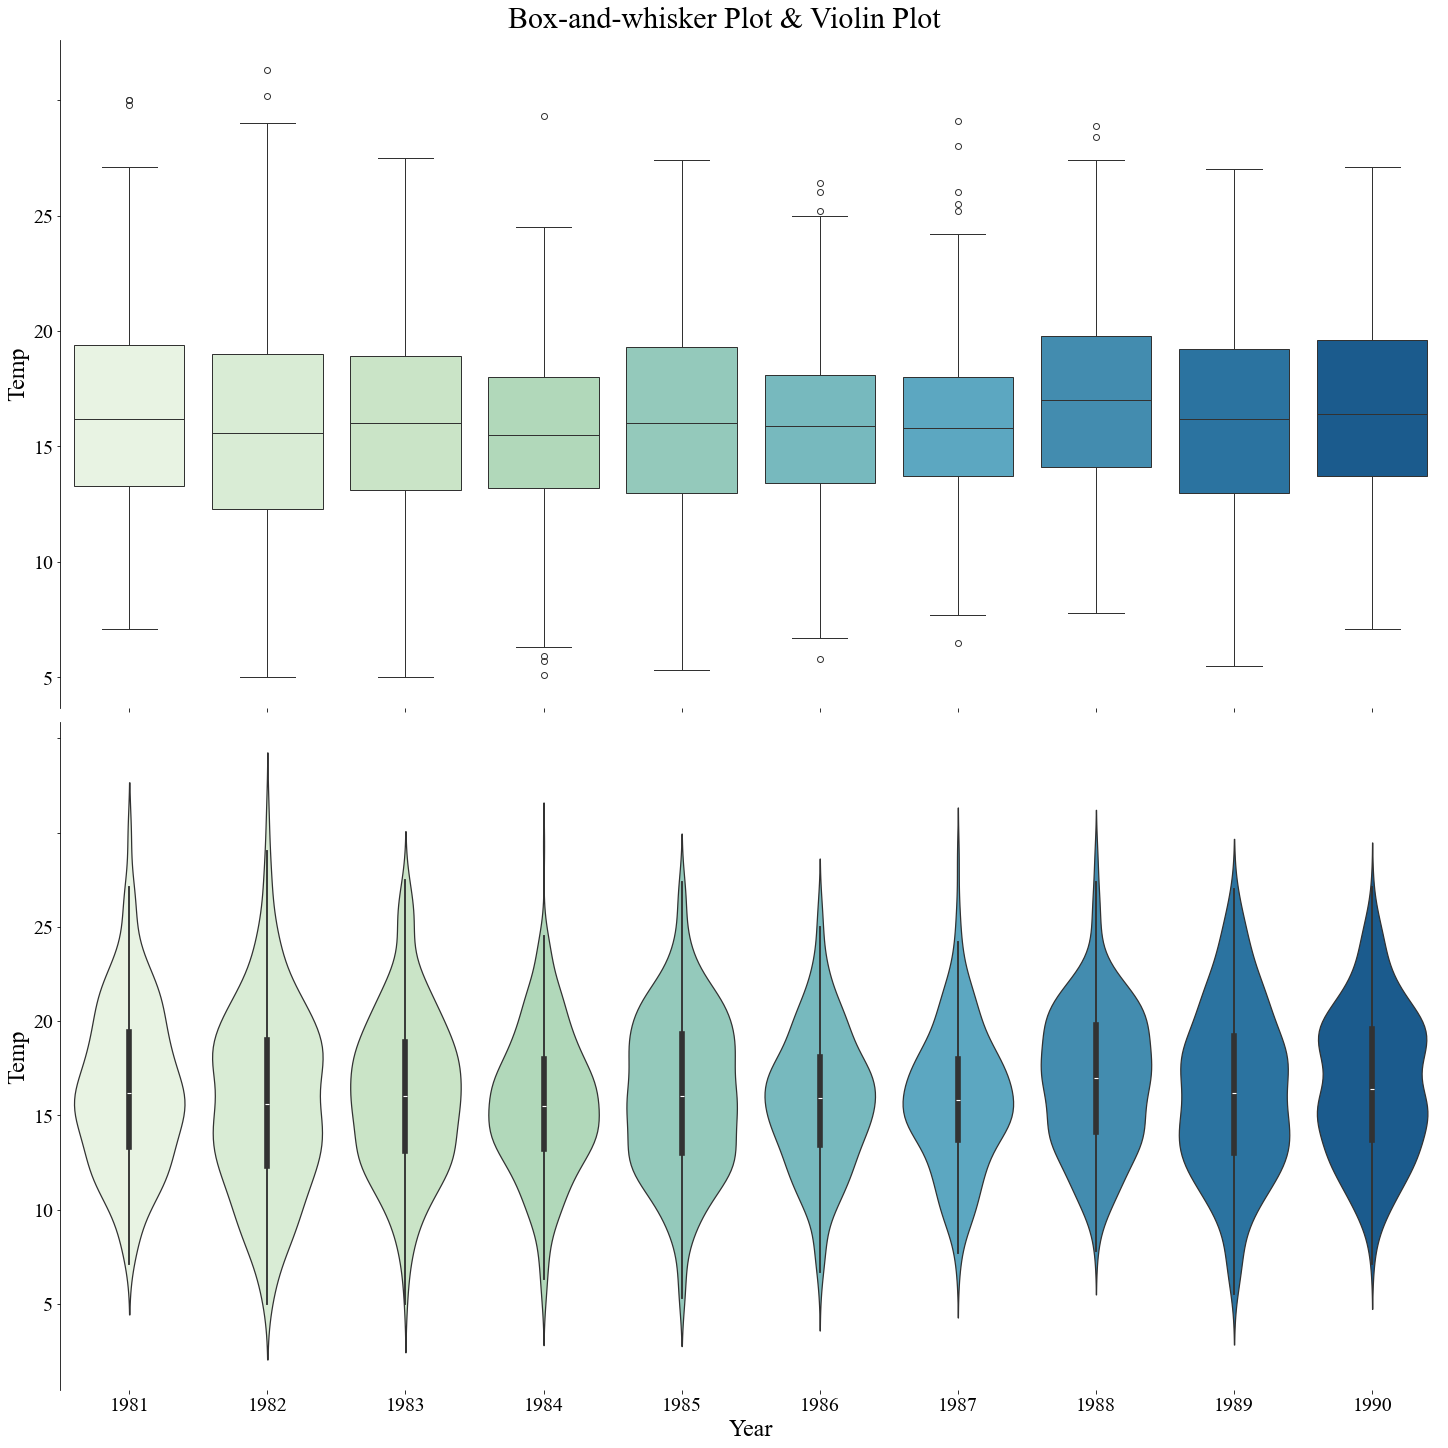

In [24]:
fig8, axs8 = plt.subplots(2,1, figsize=(20,20), sharex=True,constrained_layout=True)
fig8.suptitle('Box-and-whisker Plot & Violin Plot',fontsize=30)

# Box plot
sns.boxplot(data=TSData,x=TSData['year'], y=TSData['Temp'], palette="GnBu",ax=axs8[0])
axs8[0].set_xlabel('Year', fontsize=24)
axs8[0].set_ylabel('Temp', fontsize=24)
axs8[0].set_xticklabels(labels=yearUnique, fontsize=20)
axs8[0].set_yticklabels(labels=range(0,30,5), fontsize=20)
axs8[0].spines['right'].set_visible(False)
axs8[0].spines['top'].set_visible(False)
axs8[0].spines['bottom'].set_visible(False)

# Violin plot
sns.violinplot(data=TSData, x=TSData['year'], y=TSData['Temp'], palette="GnBu", ax=axs8[1])
axs8[1].set_xlabel('Year', fontsize=24)
axs8[1].set_ylabel('Temp', fontsize=24)
axs8[1].set_xticklabels(labels=yearUnique, fontsize=20)
axs8[1].set_yticklabels(labels=range(0,30,5), fontsize=20)
axs8[1].spines['right'].set_visible(False)
axs8[1].spines['top'].set_visible(False)
axs8[1].spines['bottom'].set_visible(False)

plt.show()

### Step6. Time series heat map

**Temperature fluctuation heat map** shows the daily changes of temperature after grouping by year.<br>  

See the [matplotlib.axes.Axes.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) for more approaches to visualize matrix.

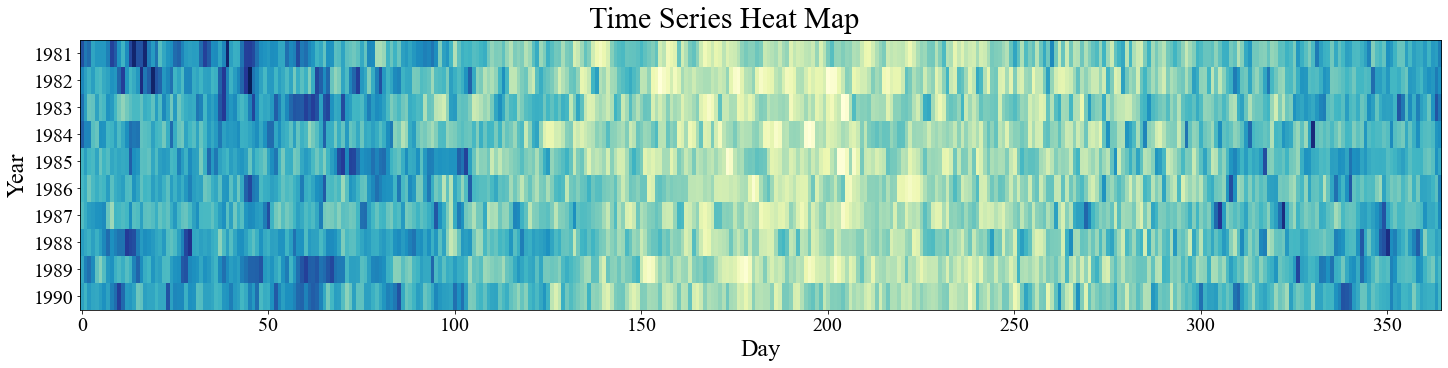

In [25]:
# Rows: year, columns: day
yearList = [TSData['Temp'][TSData['year'] == year].values for year in yearUnique]

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig9, ax9 = plt.subplots(figsize=(20,5), sharex=True,constrained_layout=True)
fig9.suptitle('Time Series Heat Map',fontsize=30)

ax9.imshow(yearList, interpolation=None, aspect='auto',cmap='YlGnBu')
ax9.set_yticks([i for i in range(10)], [str(j) for j in np.unique(TSData['year'])])
ax9.set_xlabel('Day', fontsize=24)
ax9.set_ylabel('Year', fontsize=24)
plt.show()

**Monthly temperature change of a specific year**

In [26]:
TSData['month'] = pd.to_datetime(TSData['Date'], format='%Y-%m-%d').dt.month

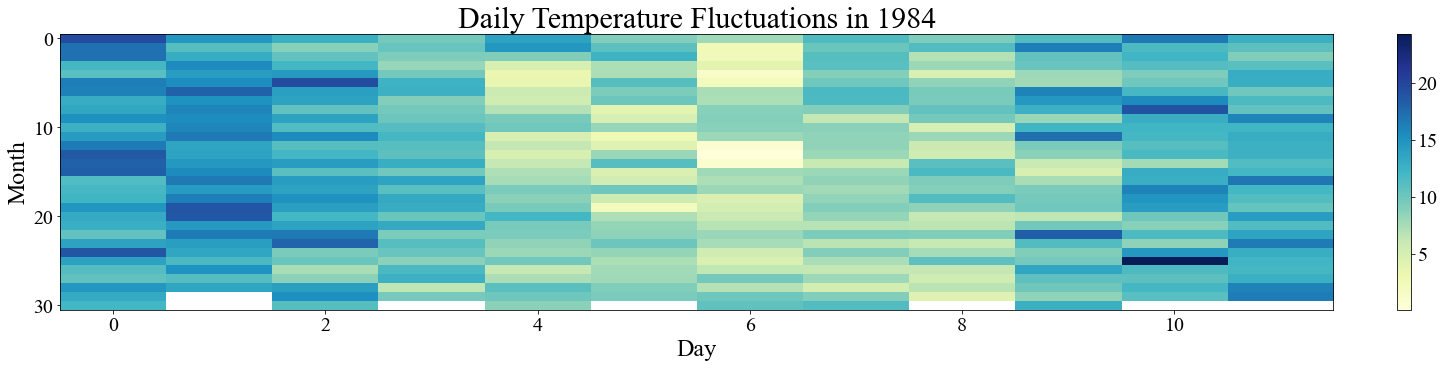

In [27]:
# Rows: month, columns: day
# Take 1984 as an example.
TS_1981 = TSData[TSData['year'] == 1984]
monthUnique = np.unique(TSData['month'].values)
groups = TS_1981.groupby(TSData['month'])
monthList = pd.concat([pd.DataFrame(x[1]['Temp'].values) for x in groups ], axis=1)

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig10,ax10 = plt.subplots(figsize=(20,5), constrained_layout=True)

ax10.set_title('Daily Temperature Fluctuations in 1984',fontsize=30)
im = ax10.imshow(monthList, interpolation=None, aspect='auto',cmap='YlGnBu')
cbar = fig10.colorbar(im, ax=ax10, orientation='vertical')    # Add cbar
ax10.set_xlabel('Day', fontsize=24)
ax10.set_ylabel('Month', fontsize=24)

plt.show()

### Step7. Lag plot for time series data

**Lag plots are most commonly used to look for patterns in time series data.**  

See [pandas.plotting.lag_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html) for more information.

Based on the relationship between $y_t$ & $y_{t-1}$, there is significant **autocorrelation** in temperature fuctuations.

In [28]:
from pandas.plotting import lag_plot

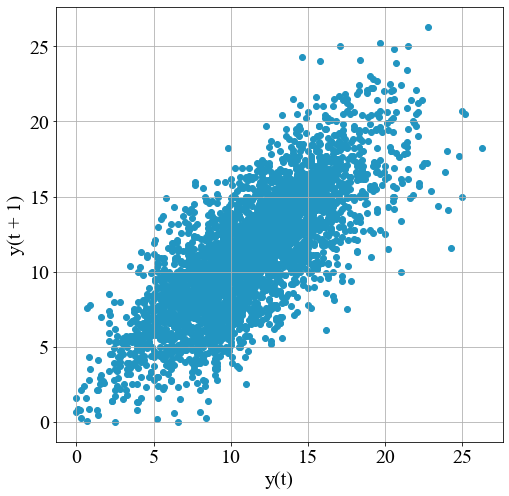

In [29]:
fig11, ax11 = plt.subplots(figsize=(8,8))
plt.rc('font',family='Times New Roman', size=20)    # Font setting
lag_plot(TSData['Temp'],lag=1, ax=ax11, c="#2295c1")
ax11.grid(True)

**Visualize more lag effects.**   

As the lag increases, the significance of lag effects decreases.

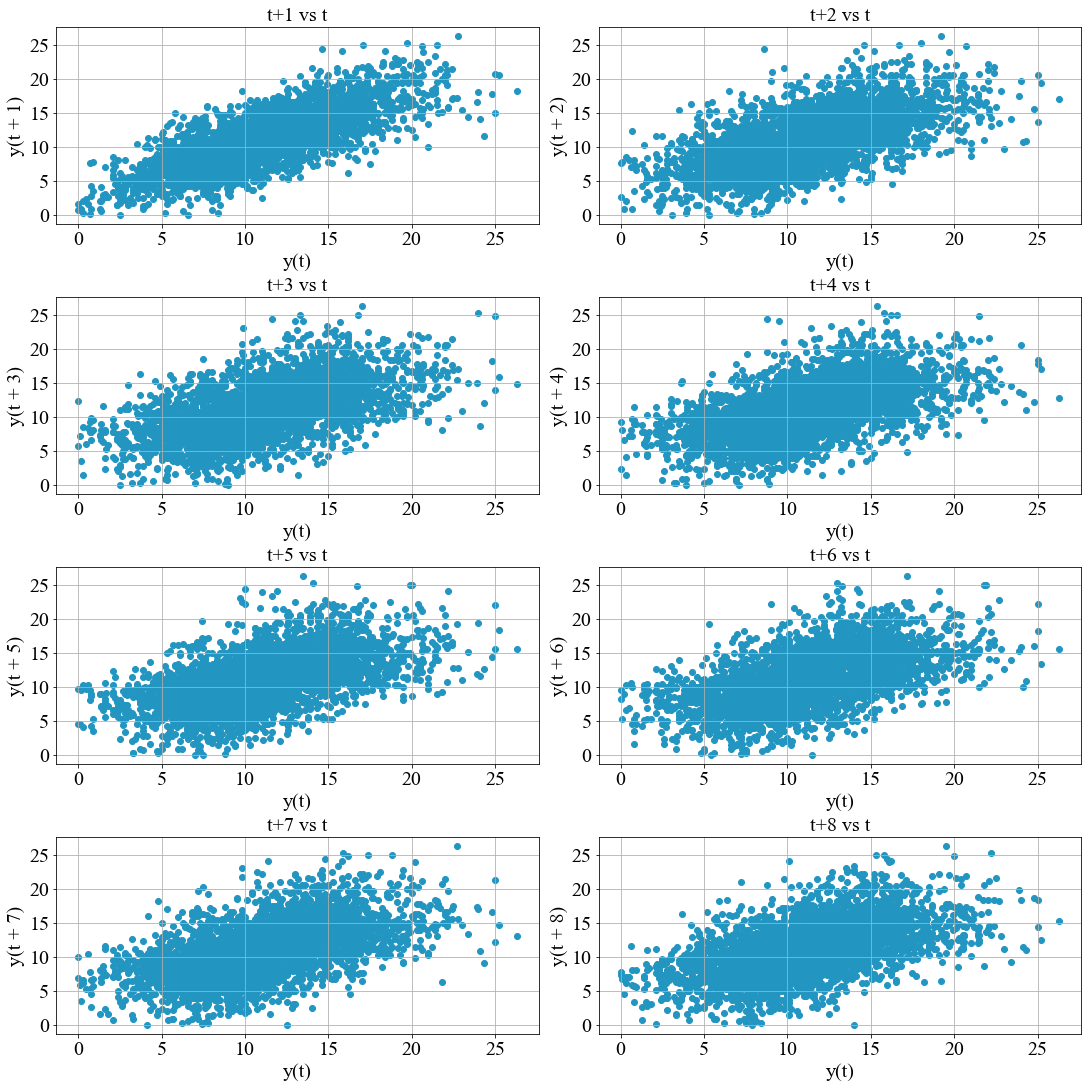

In [30]:
fig12,axs12 = plt.subplots(4,2,figsize=(15,15), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

lag_plot(TSData['Temp'], lag=1, ax=axs12[0, 0], c="#2295c1")
axs12[0, 0].set_title('t+1 vs t', fontsize=20)
axs12[0, 0].grid()

lag_plot(TSData['Temp'], lag=2, ax=axs12[0, 1], c="#2295c1")
axs12[0, 1].set_title('t+2 vs t', fontsize=20)
axs12[0, 1].grid()

lag_plot(TSData['Temp'], lag=3, ax=axs12[1, 0], c="#2295c1")
axs12[1, 0].set_title('t+3 vs t', fontsize=20)
axs12[1, 0].grid()

lag_plot(TSData['Temp'], lag=4, ax=axs12[1, 1], c="#2295c1")
axs12[1, 1].set_title('t+4 vs t', fontsize=20)
axs12[1, 1].grid()

lag_plot(TSData['Temp'], lag=5, ax=axs12[2, 0], c="#2295c1")
axs12[2, 0].set_title('t+5 vs t', fontsize=20)
axs12[2, 0].grid()

lag_plot(TSData['Temp'], lag=6, ax=axs12[2, 1], c="#2295c1")
axs12[2, 1].set_title('t+6 vs t', fontsize=20)
axs12[2, 1].grid()

lag_plot(TSData['Temp'], lag=7, ax=axs12[3, 0], c="#2295c1")
axs12[3, 0].set_title('t+7 vs t', fontsize=20)
axs12[3, 0].grid()

lag_plot(TSData['Temp'], lag=8, ax=axs12[3, 1], c="#2295c1")
axs12[3, 1].set_title('t+8 vs t', fontsize=20)
axs12[3, 1].grid()

plt.show()

### Step8. Autocorrelation plot for time series data

We apply **autocorrelation plot** in order to quantify the correlation coefficient against the lag.
- The horizontal lines in the plot correspond to 95% and 99% confidence bands.  
- The dashed line is 99% confidence band.  

ACF plots are a commonly-used tool for checking randomness in a dataset, and usually applied to determine the number of lags in the **model identification** stage, as will be discussed in the upcoming tutorial.

For more information, see the <br>
[pandas.plotting.autocorrelation_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html)   &  [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)

In [31]:
from pandas.plotting import autocorrelation_plot

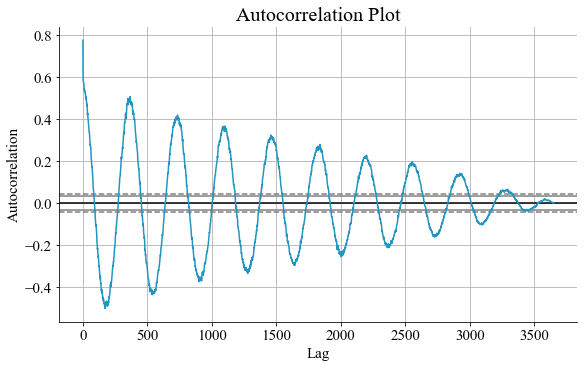

In [32]:
fig13,ax13 = plt.subplots(figsize=(8,5), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

ax13.set_title('Autocorrelation Plot',fontsize=20)
autocorrelation_plot(TSData['Temp'],ax=ax13, color="#2295c1")
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)

plt.show()

Plots lags on the horizontal and the correlations on vertical axis.

In [33]:
import statsmodels.api as sm

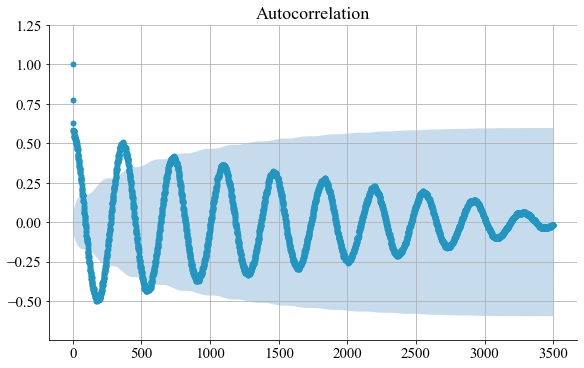

In [52]:
fig14,ax14 = plt.subplots(figsize=(8,5), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

sm.graphics.tsa.plot_acf(TSData['Temp'], 
                         use_vlines=False, 
                         lags=3500,
                         alpha=0.05,
                         ax=ax14, 
                         auto_ylims=True, 
                         color="#2295c1")
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.grid()

The difference between the two approaches we mentioned above:
- In pandas, coefficients are calculated using the mean and variance of sub-sequence.
- In stats model, coefficients are calculated utilizing the population mean and variance.